In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# データ準備

In [2]:
df = sns.load_dataset('tips')

df['tip_rate'] = df['tip'] / df['total_bill']

In [3]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_rate'],
      dtype='object')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [5]:
sns.__version__

'0.12.2'

# ヒストグラムで連続変数の分布を描画する

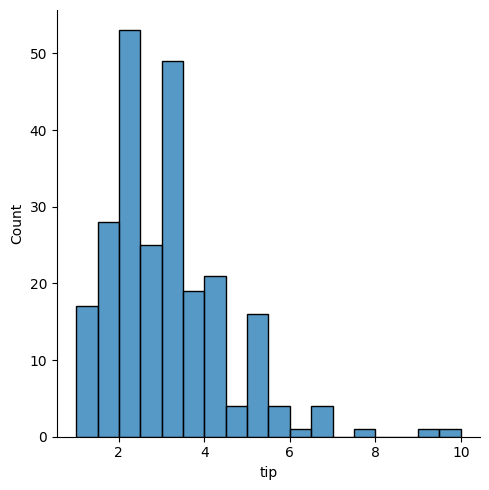

In [6]:
sns.displot(df['tip'], kde = False)

#　棒グラフでカテゴリ変数を描画する

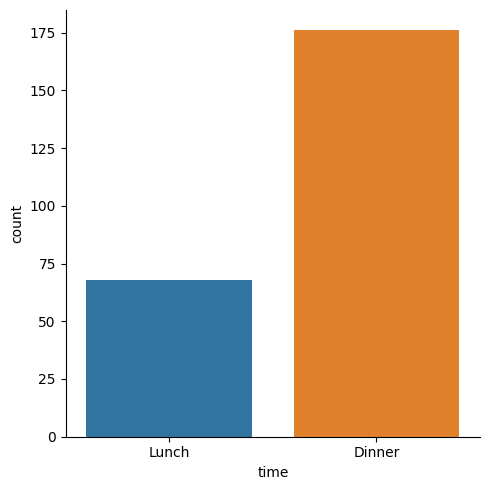

In [7]:
sns.catplot(x= 'time', data = df, kind= 'count')

# 平均値

In [8]:

np.mean([1, 2, 3])

2.0

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [10]:
np.mean(df['tip_rate'])

0.16080258172250472

In [11]:
df['tip_rate'].mean()

0.16080258172250472

## groupbyはとても便利

In [12]:
df.groupby('sex').mean()

<ipython-input-12-e22e9959c4d5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean()


,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [13]:
df.groupby('sex').mean()['tip_rate']

<ipython-input-13-8d3759b6e26c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean()['tip_rate']


sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<ipython-input-14-9f87472dab9d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='tip_rate', data=df, ci=None)


<Axes: xlabel='sex', ylabel='tip_rate'>

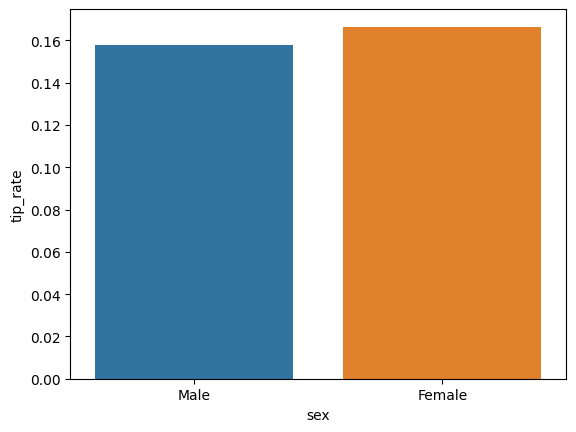

In [14]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

# 中央値

In [15]:
np.median(df['tip_rate'])

0.15476977125802577

In [16]:
df['tip_rate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_rate, Length: 244, dtype: float64

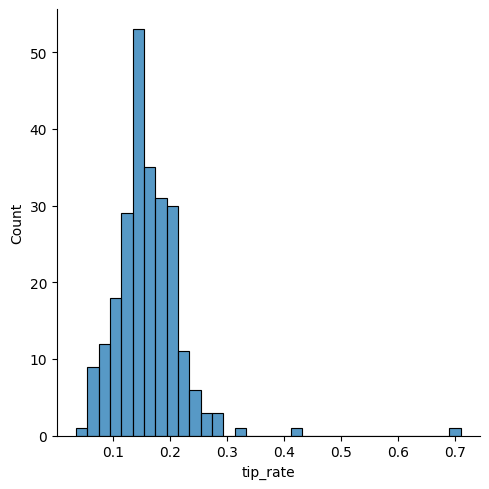

In [17]:
sns.displot(df['tip_rate'], kde = False)

In [18]:
df['tip_rate'].median()

0.15476977125802577

In [19]:
df.groupby('sex').median()

<ipython-input-19-bfa094082cee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').median()


,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<ipython-input-20-5d13bd970d2d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="sex", y="tip_rate", estimator= np.median, ci=None)


<Axes: xlabel='sex', ylabel='tip_rate'>

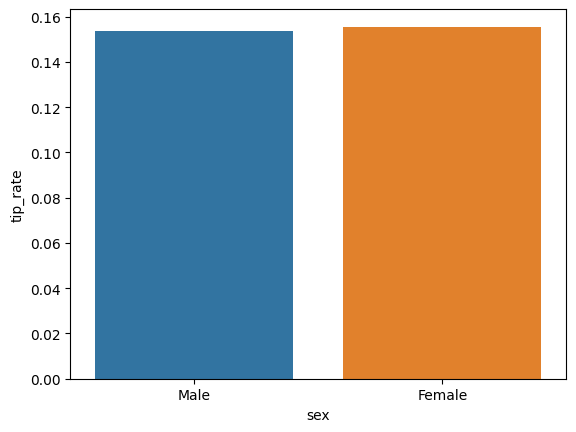

In [20]:
sns.barplot(data=df, x="sex", y="tip_rate", estimator= np.median, ci=None)

In [21]:
df.sort_values('tip_rate', ascending=True)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.035638
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
...,...,...,...,...,...,...,...,...
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667


# 最頻値

In [22]:
mode, count = stats.mode(df)

print(f'mode:{mode}')
print(f'count:{count}')

mode:[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
count:[[  3  33 157 151  87 176 156   2]]


<ipython-input-22-04bb958efbaf>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = stats.mode(df)
<ipython-input-22-04bb958efbaf>:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode, count = stats.mode(df)


In [23]:
df['size'].mode()

0    2
Name: size, dtype: int64

In [24]:
mode, count = stats.mode(df['size'])

print(f'mode:{mode}')
print(f'count:{count}')

mode:[2]
count:[156]


<ipython-input-24-859dc3e9bb21>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = stats.mode(df['size'])


In [25]:
mode, count = stats.mode(df['tip_rate'])

print(f'mode:{mode}')
print(f'count:{count}')

mode:[0.14482259]
count:[2]


<ipython-input-25-24314f5c359c>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = stats.mode(df['tip_rate'])


In [26]:
# 範囲（Range）

In [27]:
np.min(df['tip'])

1.0

In [28]:
df['tip'].min()

1.0

In [29]:
df.groupby('sex').min()

<ipython-input-29-3eee47c2438f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('sex').min()


,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [30]:
np.max(df['tip'])

10.0

In [31]:
df['tip'].max()

10.0

In [32]:
df.groupby('sex').max()

<ipython-input-32-0858c75f568a>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('sex').max()


,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


# 四分位数

In [33]:
np.quantile(df['tip_rate'], [0.25, 0.50, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [34]:
df['tip_rate'].quantile([0.25, 0.50, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [35]:
stats.iqr(df['tip_rate'])

0.06234812458689151

In [36]:
0.191475 - 0.129127

0.062348000000000015

## QD

In [37]:
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

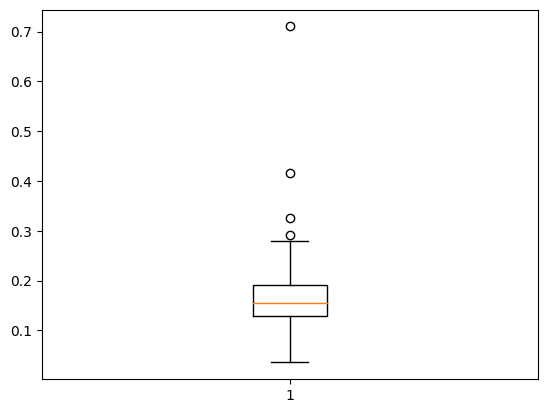

In [38]:
plt.boxplot(df['tip_rate'])
plt.show()

<Axes: xlabel='size', ylabel='tip_rate'>

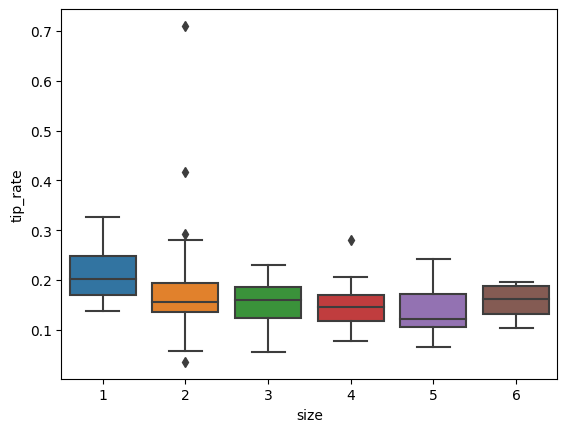

In [39]:
sns.boxplot(x= 'size', y= 'tip_rate', data= df)

# 分散と標準偏差

## 分散

In [40]:
np.var([1, 2, 3, 4, 5, 6, ])

2.9166666666666665

In [41]:
np.var(df['tip_rate'])

0.00371452800135469

## 標準偏差

In [42]:
tip_std = np.std(df['tip'])
tip_std

1.3807999538298954

In [43]:
np.sqrt(np.var(df['tip']))

1.3807999538298954

In [44]:
tip_mean = df['tip'].mean()

In [45]:
tip_mean

2.99827868852459

## 大体の予測する場合

約３分の2

In [46]:
tip_mean + tip_std

4.379078642354485

In [47]:
tip_mean - tip_std

1.6174787346946944

95％

In [48]:
tip_mean + (2 * tip_std)

5.759878596184381

In [49]:
tip_mean - (2 * tip_std)

0.236678780864799

95%から100%

In [50]:
tip_mean + (3 * tip_std)

7.140678550014275

In [51]:
tip_mean - (3 * tip_std)

-1.1441211729650962

# 共分散

In [52]:
np.cov([1, 2, 3], [-4, 5, 16], rowvar=False, bias=True)

array([[ 0.66666667,  6.66666667],
       [ 6.66666667, 66.88888889]])

In [53]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [54]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [55]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)

In [56]:
np.cov(x, bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

df.cov()は不偏分散と普遍共分散で表示される

In [57]:
df.cov()

<ipython-input-57-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


# 相関行列

In [58]:
np.corrcoef([1, 4, 5], [5, 6, 8])

array([[1.        , 0.89104211],
       [0.89104211, 1.        ]])

In [59]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [60]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [61]:
df.corr()

<ipython-input-61-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<ipython-input-62-8581877c7c63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


<Axes: >

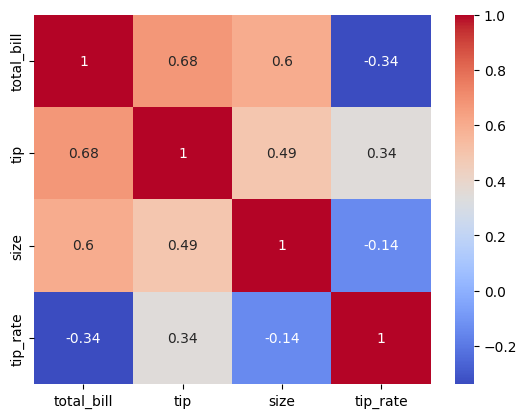

In [62]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# 連関

In [63]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [64]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

Chi2ContingencyResult(statistic=10.277251918677742, pvalue=0.0013468039268008766, dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

# クラメールの連関係数

In [65]:
chi_2 = stats.chi2_contingency(cont_table, correction=False)[0]

In [66]:
len(cont_table)

2

In [67]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi_2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape) - 1
    n = len(x)
    v = np.sqrt(chi_2 / (min_d * n))
    return v

In [68]:
cramers_v(df['sex'], df['time'])

0.20523129613344476

# 確率分布

In [69]:
# random variates: 確率変量
stats.randint.rvs(1, 7)

3

In [70]:
stats.uniform.rvs(0, 1)

0.8788753406557545

# 確立分布の描画

In [71]:
def simple_func(x):
    return x **2 + 3

In [72]:
simple_func(2)

7

In [73]:
# x = np.linspace(-3, 3, 100)
x = np.arange(-3, 4)
y = simple_func(x)

In [74]:
x

array([-3, -2, -1,  0,  1,  2,  3])

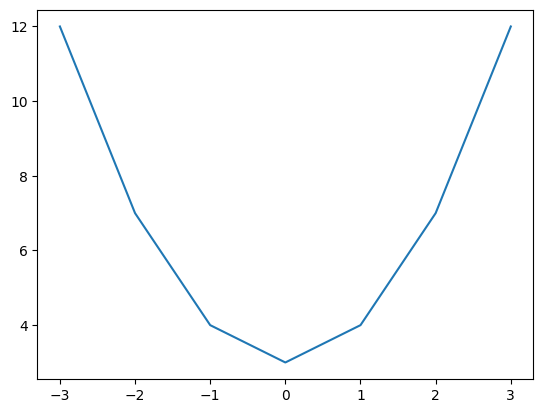

In [75]:
plt.plot(x, y)

In [76]:
y

array([12,  7,  4,  3,  4,  7, 12])

## 離散型確率分布

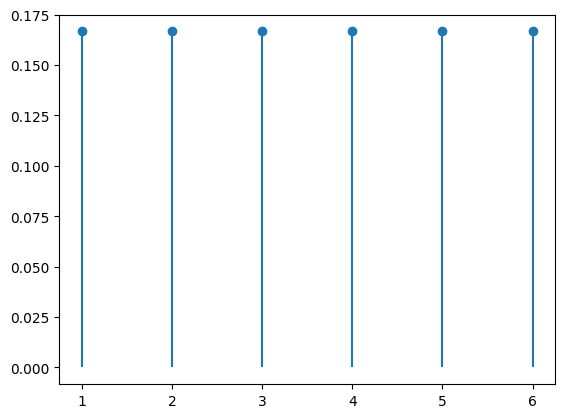

In [77]:
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

## 連続型確率分布

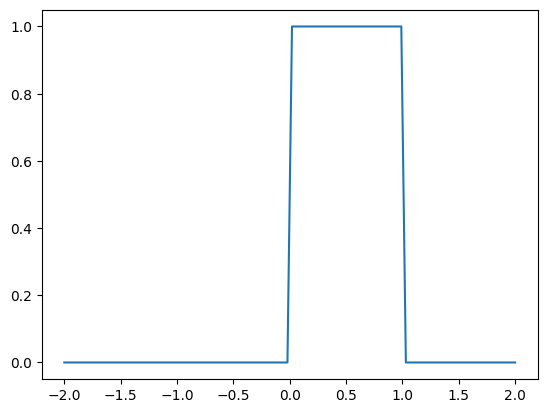

In [78]:
x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

In [79]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# CDF

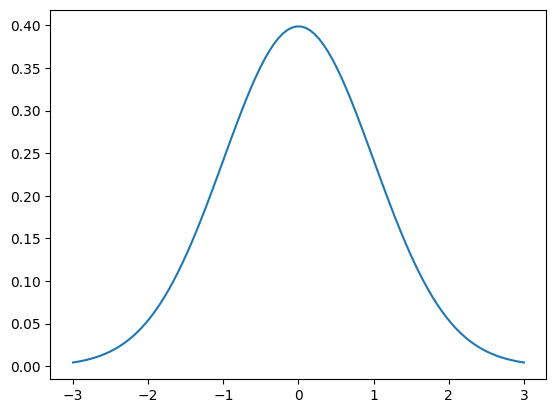

In [80]:
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

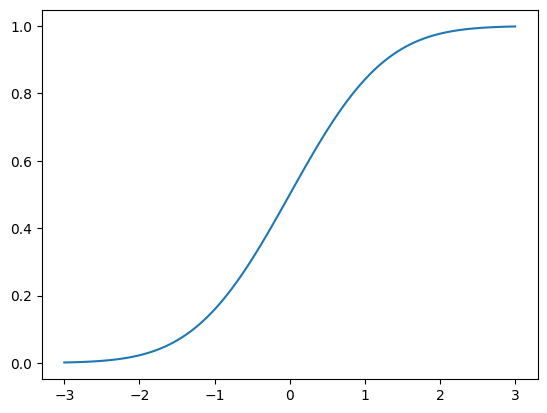

In [81]:
y = stats.norm.cdf(x)
plt.plot(x, y)


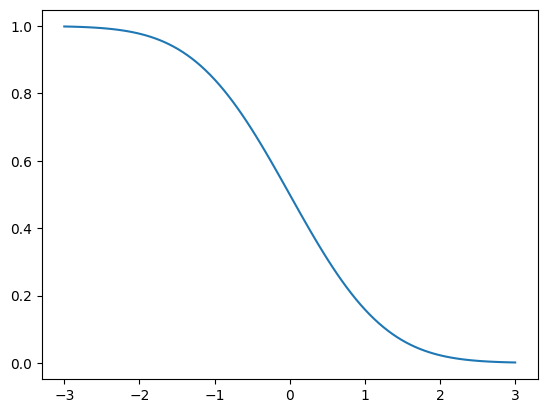

In [82]:
y = stats.norm.sf(x)
plt.plot(x, y)


#　正規分布

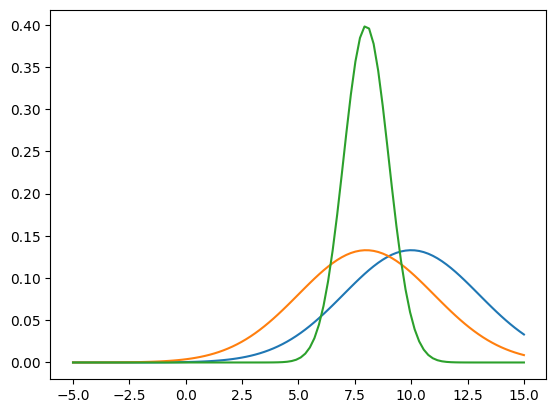

In [83]:
x = np.linspace(-5, 15, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

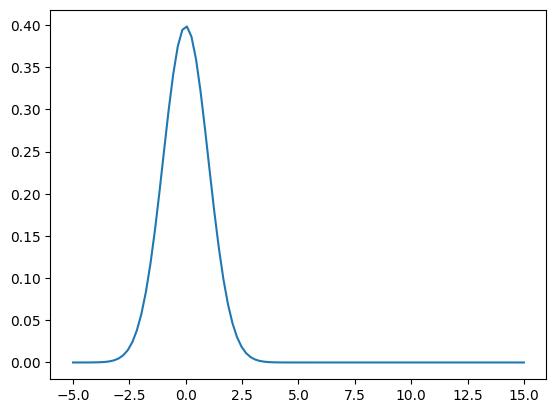

In [84]:
y = stats.norm.pdf(x)
plt.plot(x, y)

#　カーネル密度推定

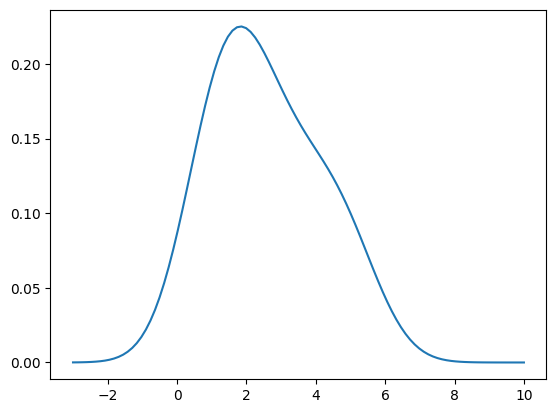

In [85]:
x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)
plt.plot(x, y)

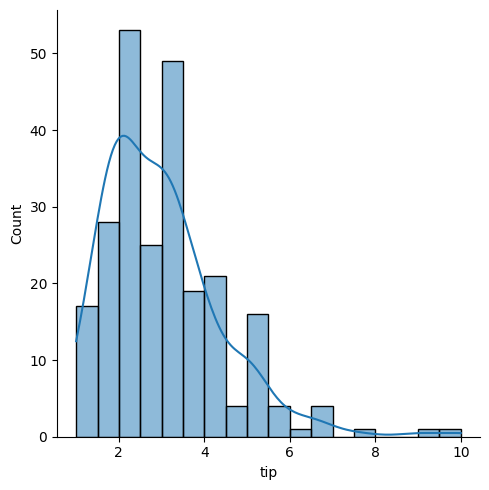

In [86]:
sns.displot(df['tip'], kde=True)

In [87]:
resample_data = stats.gaussian_kde(df['tip']).resample()

In [88]:
resample_data.shape

(1, 244)

# Chalenge

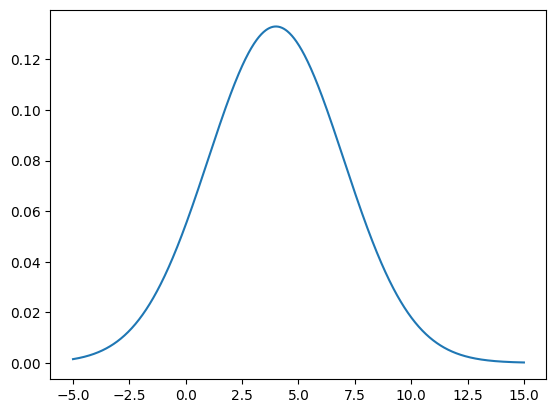

In [89]:
x = np.linspace(-5, 15, 1000)
y = stats.norm(loc=4, scale=3).pdf(x)
plt.plot(x, y)

In [90]:
x_mean = x.mean()
x_mean

5.000000000000001

In [91]:
x_std = x.std()
x_std

5.779279084228419

In [92]:
x_mean + x_std

10.77927908422842

In [93]:
x_mean - x_std

-0.7792790842284179

In [94]:
x_mean + 2*x_std

16.558558168456837

In [95]:
x_mean - 2*x_std

-6.558558168456837

# 68-95-99.7ルール

In [96]:
group1 = []
group2 = []
group3 = []
samples = []

loc = 4
scale = 3

for i in range(1000):
    sample = stats.norm(loc=loc, scale=scale).rvs()
    if loc-scale < sample < loc+scale:
        group1.append(sample)
    elif loc-2*scale < sample < loc+2*scale:
        group2.append(sample)
    elif loc-3*scale < sample < loc+3*scale:
        group3.append(sample)
    samples.append(sample)

In [97]:
len(group1)/len(samples)

0.677

In [98]:
print(f'Group1: {len(group1)/len(samples)}')
print(f'Group2: {(len(group1) + len(group2))/len(samples)}')
print(f'Group3: {(len(group1) + len(group2) + len(group3))/len(samples)}')

Group1: 0.677
Group2: 0.955
Group3: 0.997


#　標準化

In [99]:
scaler = StandardScaler()

In [100]:
scaled = scaler.fit_transform(df['tip_rate'].values.reshape(-1, 1))

## 偏差値

In [101]:
# scaled * 10 + 50

In [102]:
# scaler.fit_transform(df[['total_bill', 'tip_rate']])

# 二項分布

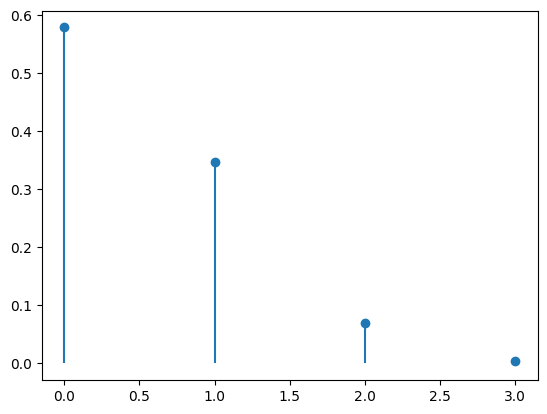

In [103]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

In [104]:
x

array([0, 1, 2, 3])

In [105]:
y

array([0.5787037 , 0.34722222, 0.06944444, 0.00462963])

## 練習問題

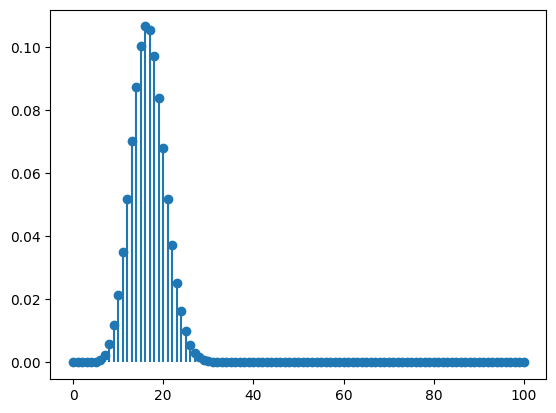

In [106]:
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n=n, p=p).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

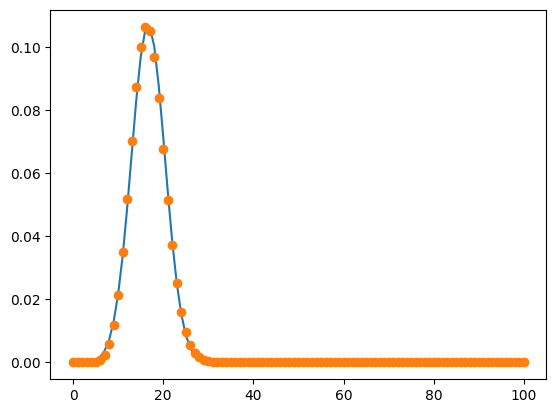

In [107]:
y2 = stats.norm(p*n, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [108]:
p * n

16.666666666666664

In [109]:
# 平均
stats.binom(n=n, p=p).mean()

16.666666666666664

In [110]:
# 分散
stats.binom(n, p).var()

13.888888888888888

In [111]:
p*n*(1-p)

13.888888888888888

In [112]:
# 標準偏差
stats.binom(n, p).std()

3.7267799624996494

In [113]:
np.sqrt(p*n*(1-p))

3.7267799624996494

#　標本分布を見てみよう（Chalenge）

In [114]:
len(df['tip'].sample(50))

50

In [115]:
# n = 50
# for i in range(100):
#     sample_df = df['tip'].sample(n)
#     print(f'---sample_df:{i}---')
#     print(f'df_mean{sample_df.mean()}')
#     print(f'df_var{sample_df.var()}')

In [116]:
print(df['tip'].mean())
print(df['tip'].var())

2.99827868852459
1.914454638062471


In [117]:
m = 100
n = 50
column = 'tip'

sample_means = []
for i in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_means.append(sample_mean)

In [118]:
# 平均
np.mean(sample_means)

3.0120080000000002

In [119]:
# 母平均
df[column].mean()

2.99827868852459

In [120]:
# 分散
np.var(sample_means)

0.028570731935999998

In [121]:
# 母分散/n
np.var(df[column])/n

0.038132170249932824

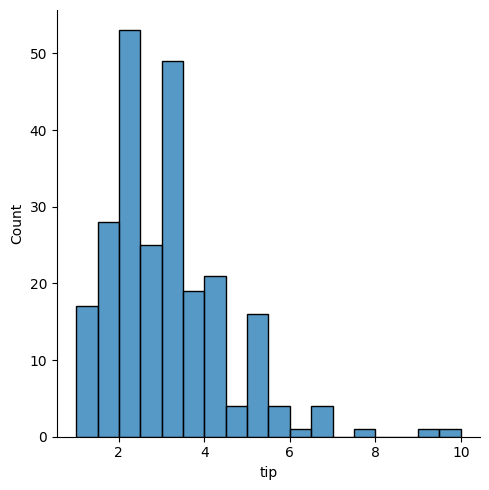

In [122]:
sns.displot(df[column])

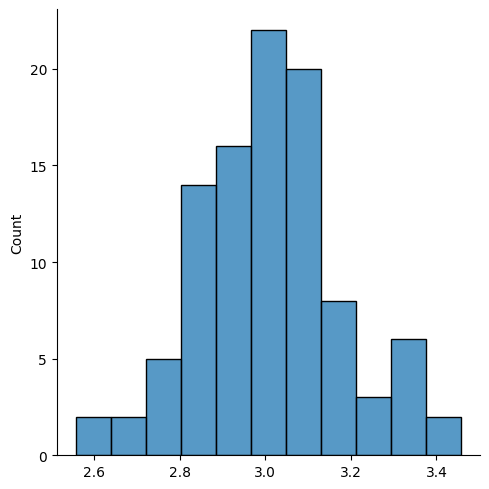

In [123]:
sns.displot(sample_means)

# 不偏分散

In [124]:
stats.tvar(df['tip'])

1.914454638062471

In [125]:
np.var(df['tip'], ddof=1)

1.914454638062471

# 不偏分散の平方根

In [126]:
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [127]:
stats.tstd(df['tip'])

1.3836381890011822

In [128]:
np.std(df['tip'], ddof=1)

1.3836381890011822

## Chalenge問題

In [129]:
m = 100
n = 50
column = 'tip'

sample_vars = []
sample_tvars = []
for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_vars.append(sample_var)
    sample_tvar = np.var(sample_df[column], ddof=1)
    sample_tvars.append(sample_tvar)

In [130]:
np.mean(sample_vars)

1.8369146300000003

In [131]:
np.mean(sample_tvars)

1.87440268367347

In [132]:
np.var(df[column])

1.9066085124966412

# 比率の区間推定

In [133]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [134]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

## Chalenge

In [135]:
n = 50
m = 100
alpha = 0.95
column = 'sex'
rate_target = 'Male'
binom_results = []

for i in range(m):
    sample_df = df.sample(n)
    value_counts = sample_df[column].value_counts()
    male_count = value_counts[rate_target]
    ratio = male_count / n
    binom_result = stats.binom.interval(alpha, n, ratio)
    binom_results.append(binom_result)

In [157]:
population_male_ratio = len(df[df['sex']=='Male']) / len(df)
results = []

for _ in range(m):
  sample_df = df.sample(n)
  male_ratio = len(sample_df[sample_df[column]==rate_target]) / len(sample_df)
  min_num, max_num = stats.binom.interval(alpha, n, male_ratio)
  min_ratio = min_num / n
  max_ratio = max_num / n

  correct = min_ratio < population_male_ratio < max_ratio
  results.append({'min': min_ratio, 'max': max_ratio, 'result': correct})

In [159]:
result_df = pd.DataFrame(results)

In [161]:
result_df['result'].value_counts()

True     99
False     1
Name: result, dtype: int64